<img src="images/hanford_variables.png">

##1. Import the necessary packages to read in the data, plot, and create a linear regression model

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## 2. Read in the hanford.csv file 

In [5]:
df = pd.read_csv("data/hanford.csv")

## 3. Calculate the basic descriptive statistics on the data

In [6]:
df

,County,Exposure,Mortality
0,Umatilla,2.49,147.1
1,Morrow,2.57,130.1
2,Gilliam,3.41,129.9
3,Sherman,1.25,113.5
4,Wasco,1.62,137.5
5,HoodRiver,3.83,162.3
6,Portland,11.64,207.5
7,Columbia,6.41,177.9
8,Clatsop,8.34,210.3


In [4]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


array([[<matplotlib.axes.AxesSubplot object at 0x1071de490>,
        <matplotlib.axes.AxesSubplot object at 0x107289850>]], dtype=object)

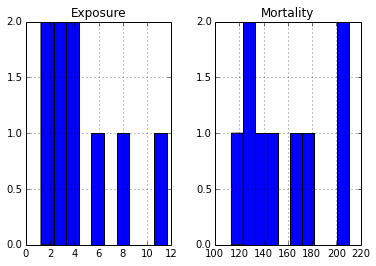

In [5]:
df.hist()

## 4. Calculate the coefficient of correlation (r) and generate the scatter plot. Does there seem to be a correlation worthy of investigation?

In [7]:
df.corr()

,Exposure,Mortality
Exposure,1.000000,0.926345
Mortality,0.926345,1.000000


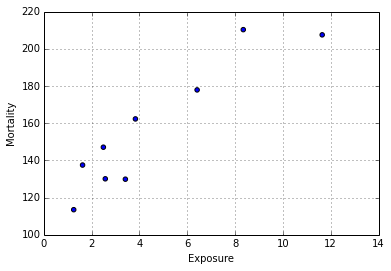

In [8]:
df.plot(kind='scatter',x='Exposure',y='Mortality')

## 5. Create a linear regression model based on the available data to predict the mortality rate given a level of exposure

In [19]:
lm = LinearRegression()

In [20]:
data = np.asarray(df[['Mortality','Exposure']])
x = data[:,1:]
y = data[:,0]

In [21]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)

In [22]:
lm.score(x,y)

0.85811472686989465

In [25]:
m = lm.coef_[0]
m

9.2314562707633918

In [26]:
b = lm.intercept_
b

114.71563082078595

## 6. Plot the linear regression line on the scatter plot of values. Calculate the r^2 (coefficient of determination)

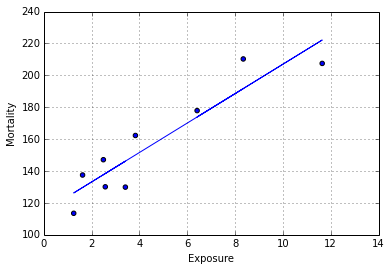

In [21]:
df.plot(kind='scatter',x='Exposure',y='Mortality')
plt.plot(df['Exposure'],m*df['Exposure']+b,'-')

## 7. Predict the mortality rate (Cancer per 100,000 man years) given an index of exposure = 10

In [24]:
lm.predict(10)

array([ 207.03019353])

#Now using statsmodels

In [1]:
import statsmodels.formula.api as smf

In [27]:
lm = smf.ols(formula='Mortality~Exposure',data=df).fit()

In [28]:
lm.params

Intercept    114.715631
Exposure       9.231456
dtype: float64

In [29]:
intercept, slope = lm.params

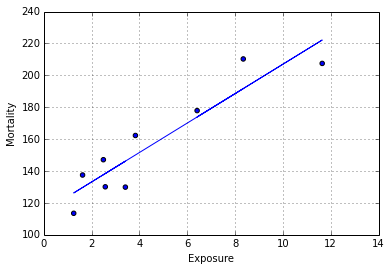

In [33]:
df.plot(kind='scatter',x='Exposure',y='Mortality')
plt.plot(df['Exposure'],slope*df['Exposure']+intercept,'-')

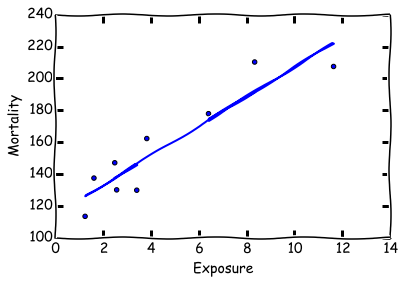

In [34]:
plt.xkcd()
df.plot(kind='scatter',x='Exposure',y='Mortality')
plt.plot(df['Exposure'],slope*df['Exposure']+intercept,'-')

In [30]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     42.34
Date:                Wed, 29 Jul 2015   Prob (F-statistic):           0.000332
Time:                        21:35:49   Log-Likelihood:                -35.397
No. Observations:                   9   AIC:                             74.79
Df Residuals:                       7   BIC:                             75.19
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    114.7156      8.046     14.258      0.000        95.691   133.741
Exposure       9.2315      1.419      6.507      0.000         5.877    12.586
==============================================================================
Omnibus:                        2.914   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                0.915
Skew:                          -0.030   Prob(JB):                        0.633
Kurtosis:                       1.439   Cond. No.                         9.97
==============================================================================
"""

In [31]:
lm.mse_model

8309.5558645662404

In [32]:
lm.pvalues

Intercept    0.000002
Exposure     0.000332
dtype: float64